In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
memops = {'scal':2, 'axpby':3, 'pointwiseDot':6, 'dot':2, 'dx':3, 'dy':3,
         'arakawa':34, 'cg':42}

In [18]:
#read in csv file
df1 = pd.read_csv('benchmark_gtx1060.csv', delimiter=' ')
#add size and get rid of non-relevant columns
df1.insert(0,'size', 8*df1['n']*df1['n']*df1['Nx']*df1['Ny']/1e6)
dfb=df1
for name, mem in memops.items():
    dfb[name] = df1['size']/1000*mem/df1[name]
dfr = dfb[['n','Nx','Ny','size']+list(memops.keys())]
#dfr

In [19]:
#compute mean and standard derivation of 'same' groups 
dfr=dfr.groupby(['n', 'Nx','Ny','size']).agg(['mean', 'std'])
dfr=dfr.reset_index(level=['n','Nx','Ny','size'])

In [20]:
dfr

n    Nx    Ny    size    dot     pointwiseDot          cg        scal      \
                            mean std         mean std    mean std    mean std   
0   2   128   128    0.52   6.78 NaN       139.80 NaN   53.04 NaN  301.44 NaN   
1   2   256   256    2.10  13.95 NaN       152.37 NaN   86.43 NaN  145.79 NaN   
2   2   384   384    4.72  19.30 NaN       155.36 NaN   97.08 NaN  147.92 NaN   
3   2   512   512    8.39  20.90 NaN       156.24 NaN  101.09 NaN  150.08 NaN   
4   2   768   768   18.87  22.40 NaN       156.73 NaN  104.08 NaN  150.43 NaN   
5   2  1024  1024   33.55  22.83 NaN       157.05 NaN  105.14 NaN  150.44 NaN   
6   2  1536  1536   75.50  23.22 NaN       157.24 NaN  105.45 NaN  149.31 NaN   
7   2  2048  2048  134.22  25.18 NaN       157.18 NaN  107.02 NaN  150.59 NaN   
8   3   128   128    1.18  12.65 NaN       148.76 NaN   72.79 NaN  480.60 NaN   
9   3   256   256    4.72  18.98 NaN       155.44 NaN   91.97 NaN  148.01 NaN   
10  3   384   384   10.62  21.12 NaN       156.50 NaN   96.70 NaN  150.46 NaN   
11  3   512   512   18.87  21.97 NaN       156.89 NaN   98.41 NaN  150.14 NaN   
12  3   768   768   42.47  22.65 NaN       157.15 NaN   99.65 NaN  150.62 NaN   
13  3  1024  1024   75.50  23.06 NaN       157.36 NaN  100.05 NaN  149.31 NaN   
14  3  1536  1536  169.87  26.44 NaN       157.09 NaN  101.99 NaN  150.40 NaN   
15  3  2048  2048  301.99  26.63 NaN       156.96 NaN     NaN NaN  150.43 NaN   
16  4   128   128    2.10  15.26 NaN       152.43 NaN   77.05 NaN  146.50 NaN   
17  4   256   256    8.39  20.56 NaN       156.33 NaN   88.02 NaN  149.33 NaN   
18  4   384   384   18.87  21.97 NaN       156.91 NaN   90.60 NaN  150.17 NaN   
19  4   512   512   33.55  22.52 NaN       157.06 NaN   91.49 NaN  150.60 NaN   
20  4   768   768   75.50  22.90 NaN       157.30 NaN   91.69 NaN  149.72 NaN   
21  4  1024  1024  134.22  24.88 NaN       157.23 NaN   93.04 NaN  149.38 NaN   
22  4  1536  1536  301.99  26.45 NaN       157.02 NaN     NaN NaN  150.28 NaN   
23  4  2048  2048  536.87  26.67 NaN       157.17 NaN     NaN NaN  151.42 NaN   
24  5   128   128    3.28  17.88 NaN       154.43 NaN   77.94 NaN  148.17 NaN   
25  5   256   256   13.11  21.51 NaN       156.60 NaN   85.04 NaN  150.06 NaN   
26  5   384   384   29.49  22.45 NaN       157.02 NaN   86.49 NaN  150.34 NaN   
27  5   512   512   52.43  22.77 NaN       157.02 NaN   86.60 NaN  150.61 NaN   
28  5   768   768  117.96  23.67 NaN       157.24 NaN   87.15 NaN  150.19 NaN   
29  5  1024  1024  209.72  26.41 NaN       157.04 NaN     NaN NaN  150.22 NaN   
30  5  1536  1536  471.86  26.67 NaN       157.08 NaN     NaN NaN  151.17 NaN   
31  5  2048  2048  838.86  26.51 NaN       157.30 NaN     NaN NaN  152.23 NaN   

        dy       axpby     arakawa          dx      
      mean std    mean std    mean std    mean std  
0   111.87 NaN  368.35 NaN  113.43 NaN  111.38 NaN  
1   117.51 NaN  149.44 NaN  131.31 NaN  117.42 NaN  
2   128.43 NaN  153.22 NaN  139.38 NaN  127.94 NaN  
3   130.59 NaN  154.00 NaN  141.08 NaN  129.96 NaN  
4   132.28 NaN  155.12 NaN  141.89 NaN  131.00 NaN  
5   132.19 NaN  155.34 NaN  142.55 NaN  130.89 NaN  
6   131.97 NaN  155.55 NaN  142.66 NaN  130.32 NaN  
7   131.23 NaN  155.72 NaN  142.66 NaN  131.13 NaN  
8   102.31 NaN  149.27 NaN  119.45 NaN  103.66 NaN  
9   111.42 NaN  153.22 NaN  128.05 NaN  111.57 NaN  
10  112.64 NaN  154.44 NaN  128.80 NaN  113.79 NaN  
11  111.33 NaN  155.17 NaN  129.89 NaN  113.82 NaN  
12  110.97 NaN  155.46 NaN  131.07 NaN  112.83 NaN  
13  110.46 NaN  155.66 NaN  130.88 NaN  112.99 NaN  
14  107.76 NaN  156.01 NaN  129.39 NaN  112.78 NaN  
15  106.59 NaN  156.33 NaN  128.76 NaN  114.45 NaN  
16   90.28 NaN  149.55 NaN  108.75 NaN   84.13 NaN  
17   94.82 NaN  154.10 NaN  112.72 NaN   87.85 NaN  
18   96.02 NaN  155.15 NaN  114.34 NaN   88.22 NaN  
19   95.33 NaN  155.42 NaN  114.54 NaN   88.42 NaN  
20   93.41 NaN  156.07 NaN  114.23 NaN   88.57 NaN  
21   93.52 NaN  155.79 NaN  11

In [12]:
base_bandwidth = dfr[('axpby','mean')].iloc[15] # base bandwidth at 3 2048 2048 
for name, mem in memops.items():
    dfr[(name,'eff')]= dfr[(name,'mean')]/base_bandwidth
    dfr[(name,'eff_err')]=dfr[(name,'std')]/base_bandwidth
#now display all bandwidth results

In [13]:
cols=[(m,'eff') for m in memops.keys()]
efficiency=dfr[['n','Nx','Ny','size']].join( dfr[cols])
cols=[(m,'eff_err') for m in memops.keys()]
efficiency=efficiency.join( dfr[cols])
#dfr=dfr.sort_values(by='size')
#efficiency=efficiency.set_index('size')

In [14]:
pd.set_option('precision',2)
efficiency=efficiency.sort_values(by='size')
#efficiency.loc[:,'size']
#efficiency['axpby']

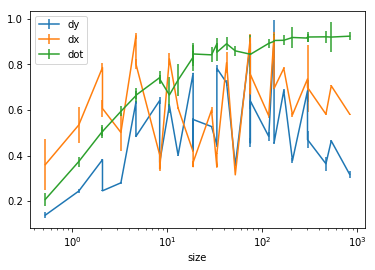

In [15]:
fig=plt.figure()
ax = efficiency['dy'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err')
ax = efficiency['dx'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
ax = efficiency['dot'].plot(style='ro',x=efficiency.loc[:,'size'],y='eff',yerr='eff_err',ax=ax)
plt.xscale('log')
ax.legend(['dy','dx','dot'])

/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


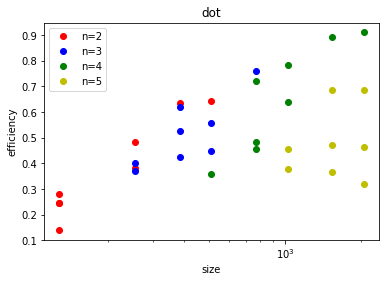

210.08206473891696

In [16]:
fig=plt.figure()
plotlist = [('dy','eff')]
stylelist = ['ro','bo','go','yo']
#efficiency.iloc[8:24].plot(x=('size',''),y=[('cg','eff'),('arakawa','eff')],style=['ro','bo'],logx=True)
ax = efficiency.iloc[0:8].plot(    x=('Nx',''),y=plotlist,style=stylelist[0])
efficiency.iloc[8:16].plot(ax=ax,  x=('Nx',''),y=plotlist,style=stylelist[1])
efficiency.iloc[16:24].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[2])
efficiency.iloc[24:32].plot(ax=ax, x=('Nx',''),y=plotlist,style=stylelist[3])
#plt.loglog()
plt.title('dot')
plt.xscale('log')
plt.ylabel('efficiency')
plt.xlabel('size')
plt.legend(['n=2','n=3','n=4','n=5'])
plt.show()
base_bandwidth